In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import, division

In [3]:
import numpy as np
from wgomoku import (
    GomokuBoard, Move, StochasticMaxSampler, HeuristicGomokuPolicy, ThreatSearch,
    Heuristics, GomokuTools as gt, create_sample)

In [4]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK=0
WHITE=1
EDGES=2

In [5]:
import pandas as pd
df = pd.read_csv("self_play_games-1.csv")
game = df['game'][0]
game

'i10h9j9h11k10j10g6m12l9m8m6i12k9m9i8h7k8l7'

In [6]:
stones = gt.string_to_stones(game)
stones = [(ord(x)-64, y) for x,y in stones]
stones

[(9, 10),
 (8, 9),
 (10, 9),
 (8, 11),
 (11, 10),
 (10, 10),
 (7, 6),
 (13, 12),
 (12, 9),
 (13, 8),
 (13, 6),
 (9, 12),
 (11, 9),
 (13, 9),
 (9, 8),
 (8, 7),
 (11, 8),
 (12, 7)]

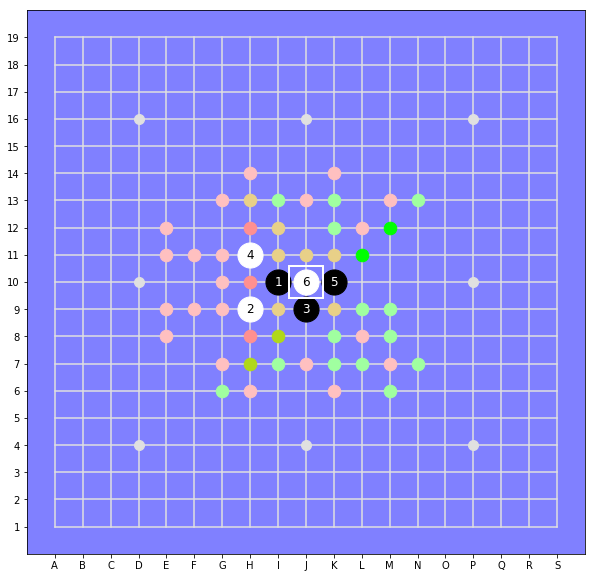

In [7]:
size=19
until = 6
heuristics = Heuristics(kappa=3.0)
board = GomokuBoard(N=size, stones=stones[:until], disp_width=10, heuristics=heuristics)
board.display('current')

### Creating policy samples

In [8]:
viewpoint = BLACK if len(stones)%2 == 0 else WHITE
sample = create_sample(N=size, stones=stones[:until], viewpoint=viewpoint)
move = np.zeros([size+2, size+2], dtype=np.int64)
x, y = stones[until]
r,c = gt.b2m((x,y), size)
move[r+1][c+1] = 1
np.rollaxis(sample, 2, 0), move, x, y

(array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0